# OpenCV Filters Webcam

In this notebook, several filters will be applied to webcam images.

Those input sources and applied filters will then be displayed either directly in the notebook or DisplayPort output.

To run all cells in this notebook a webcam and DisplayPort output monitor are required.  

## 1. Start DisplayPort output 
### Step 1: Load the overlay

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

### Step 2: Initialize DisplayPort I/O

In [2]:
displayport = DisplayPort()
displayport.configure(VideoMode(1280, 720, 24), PIXEL_RGB)

## 2. Applying OpenCV filters on Webcam input
### Step 1: Specify webcam resolution

In [3]:
# camera (input) configuration
frame_in_w = 1280
frame_in_h = 720

### Step 2: Initialize camera from OpenCV

In [4]:
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


### Step 3: Send webcam input to DisplayPort output

In [5]:
import numpy as np

ret, frame_vga = videoIn.read()

if (ret): 
    outframe = displayport.newframe()
    outframe[:] = frame_vga
    displayport.writeframe(outframe)
else:
    raise RuntimeError("Error while reading from camera.")

### Step 4: Edge detection 
Detecting edges on webcam input and display on DisplayPort out.

In [6]:
import time

num_frames = 20
readError = 0

start = time.time()
for i in range (num_frames):   
    # read next image
    ret, frame_vga = videoIn.read()
    if (ret):        
        outframe = displayport.newframe()
        laplacian_frame = cv2.Laplacian(frame_vga, cv2.CV_8U, dst=outframe)        
        displayport.writeframe(outframe)
    else:
        readError += 1
end = time.time()

print("Frames per second: " + str((num_frames-readError) / (end - start)))
print("Number of read errors: " + str(readError))

Frames per second: 12.056633901866574
Number of read errors: 0


### Step 5: Canny edge detection
Detecting edges on webcam input and display on DisplayPort out.

Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. As we only need a single output channel reconfigure the DisplayPort output to work in grayscale mode. This means that our output frame is in the correct format for the edge detection algorith,

In [7]:
num_frames = 20

displayport = DisplayPort()
displayport.configure(VideoMode(1280, 720, 24), PIXEL_RGB)

start = time.time()
for i in range (num_frames):
    # read next image
    ret, frame_webcam = videoIn.read()
    if (ret):
        outframe = displayport.newframe()
        cv2.Canny(frame_webcam, 100, 110, edges=outframe)        
        displayport.writeframe(outframe)
    else:
        readError += 1
end = time.time()

print("Frames per second: " + str((num_frames-readError) / (end - start)))
print("Number of read errors: " + str(readError))

Frames per second: 10.86417130888105
Number of read errors: 0


### Step 6: Show results
Now use matplotlib to show filtered webcam input inside notebook.

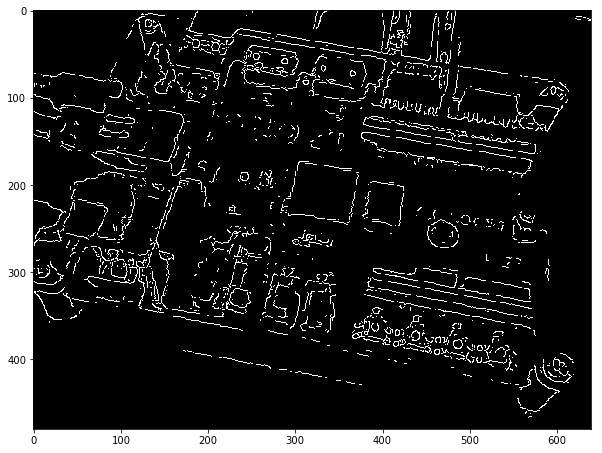

In [8]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

frame_canny = cv2.Canny(frame_webcam, 100, 110)
plt.figure(1, figsize=(10, 10))
frame_vga = np.zeros((720,1280,3)).astype(np.uint8)
frame_vga[:,:,0] = frame_canny
frame_vga[:,:,1] = frame_canny
frame_vga[:,:,2] = frame_canny
plt.imshow(frame_vga)
plt.show()

### Step 7: Release camera and DisplayPort

In [9]:
videoIn.release()
displayport.close()

Copyright (c) 2022 Xilinx, Inc 
<br>
Copyright (C) 2022-2025 Advanced Micro Devices, Inc. 
<br>
SPDX-License-Identifier: BSD-3-Clause 